In [1]:
import random
from random import seed
from random import random
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [2]:
#massive of tests
massive_tests = []
for root, dirs, files in os.walk("./цифры"): 
    for filename in files:
        massive_tests.append((np.asarray(Image.open(f'./цифры/{filename}').convert("L"))/255).reshape(1, -1))
        
for i in range(len(massive_tests)):
    for j in range(len(massive_tests[i][0])):
        if massive_tests[i][0][j] == 1.0:
            massive_tests[i][0][j] = 0.0
        elif massive_tests[i][0][j] == 0.0:
            massive_tests[i][0][j] = 1.0

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def normalization(t):
    ver = abs(sum(sum(t)))
    if ver > 1:
        return 1
    return ver

# Define neural network architecture
class NeuralNetwork:
    error = []
    stop = False
    def __init__(self, input_size, hidden_size):
        #массив весов
        self.weights1 = np.random.randn(input_size, hidden_size)
        #массив нулей
        self.bias1 = np.zeros((1, hidden_size))
    def forward(self, x):
        # движение вперед
        hidden_output = np.dot(x, self.weights1) + self.bias1
        hidden_output = sigmoid(hidden_output)
        return hidden_output

    def fit(self,x,right):
        # вычисление выхода
        hidden_output = np.dot(x, self.weights1) + self.bias1
        hidden_output = sigmoid(hidden_output)
        # нахождение ошибки
        err = right - hidden_output
        
        adjustments = np.dot(x.T, 0.08 * err)
        # корректировка весов и сдвига
        self.weights1 += adjustments
        self.bias1 += np.dot(0.08, err)
        # визуализация ошибки
        self.error.append(normalization(err))


nn = NeuralNetwork(784, 4)

right = [[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],
        [0,1,0,0],[0,1,0,0],[0,1,0,0],[0,1,0,0],
        [0,0,1,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],
        [0,0,0,1],[0,0,0,1],[0,0,0,1],[0,0,0,1]]

for j in range(20):
    for i in range(len(massive_tests)):
        nn.fit(massive_tests[i],right[i])

def calc_accuracy():
    correct = 0
    for x in range(len(massive_tests)):
        z = nn.forward(massive_tests[x])
        y_pred = np.argmax(z)
        if y_pred == np.argmax(right[x]):
            correct += 1
    acc = correct / len(massive_tests)
    return acc

calc_accuracy()

1.0

In [4]:
preprocessed_image = (np.asarray(Image.open('./тест цифры/тест 1 Embrima.bmp').convert("L"))/255)
input_vector = preprocessed_image.reshape(1, -1)

for i in range(len(input_vector[0])):
    if input_vector[0][i] == 1.0:
        input_vector[0][i] = 0.0
    elif input_vector[0][i] == 0.0:
        input_vector[0][i] = 1.0

output = nn.forward(input_vector)

if np.argmax(output) == 0:
    print(1)
if np.argmax(output) == 1:
    print(2)
if np.argmax(output) == 2:
    print(3)
if np.argmax(output) == 3:
    print(5)

1


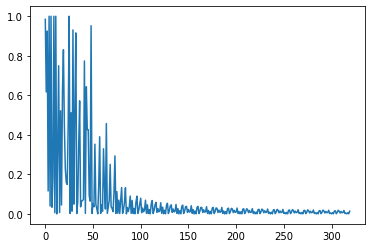

In [5]:
plt.plot(nn.error)
plt.show()